<a href="https://colab.research.google.com/github/shubhs777c/python-practice/blob/main/retail_sales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
# importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Data collection**

In [178]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
# Reading the comma seperated value file by using pandas operation. 
df= pd.read_csv('/content/drive/MyDrive/credit card fraud data /Rossmann Stores Data.csv')


<ipython-input-179-b6cdd9f75c27>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/content/drive/MyDrive/credit card fraud data /Rossmann Stores Data.csv')


# **Data understanding**

In [180]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [181]:
df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
820341,487,3,2013-06-26,4675,533,1,0,0,1
957332,333,6,2013-02-23,7088,986,1,0,0,0
555897,298,2,2014-02-18,8903,666,1,1,0,0
497087,583,6,2014-04-12,2816,310,1,0,0,0
807621,32,7,2013-07-07,0,0,0,0,0,0


In [182]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [184]:
df[['year', 'month', 'day']] = df['Date'].str.split('-', expand=True)
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,07,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,07,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,07,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,07,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,07,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,01,01
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,01,01
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,01,01
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,01,01


In [185]:
df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [186]:
df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [187]:
df.duplicated().value_counts()

False    1017209
dtype: int64

In [188]:
 df=df.drop(['StateHoliday', 'Date'],axis=1)


In [189]:
df

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day
0,1,5,5263,555,1,1,1,2015,07,31
1,2,5,6064,625,1,1,1,2015,07,31
2,3,5,8314,821,1,1,1,2015,07,31
3,4,5,13995,1498,1,1,1,2015,07,31
4,5,5,4822,559,1,1,1,2015,07,31
...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,1,2013,01,01
1017205,1112,2,0,0,0,0,1,2013,01,01
1017206,1113,2,0,0,0,0,1,2013,01,01
1017207,1114,2,0,0,0,0,1,2013,01,01


In [190]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'year', 'month', 'day'],
      dtype='object')

In [191]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [192]:
# count no of stores.
# total sales of store .
# total customer count.
# store wise customer acquisition.
# statholidat format wrong .
# highest sale of first 5 customers.
# customers who never brought items .
# open and closes analysis.
# yearwise and monthwise sales 

# **EDA**

In [193]:
# # count no of stores
df['Store'].value_counts().sort_values(ascending=True)

155     758
710     758
711     758
712     758
191     758
       ... 
1064    942
1063    942
1062    942
1070    942
177     942
Name: Store, Length: 1115, dtype: int64

In [194]:
df['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [195]:
# total sales of store .

grouped = df.groupby('Store')['Sales','Customers'].sum().sort_values(by='Sales' ,ascending=False)
grouped

<ipython-input-195-189e4c1fda0d>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = df.groupby('Store')['Sales','Customers'].sum().sort_values(by='Sales' ,ascending=False)


,Sales,Customers
Store,,
262,19516842,3204694
817,17057867,2454370
562,16927322,2924960
1114,16202585,2509542
251,14896870,1908934
...,...,...
263,2306075,221342
208,2302052,324162
198,2268273,264690


In [196]:
df['Customers'].value_counts()

0       172869
560       2414
576       2363
603       2337
571       2330
         ...  
4815         1
3998         1
4210         1
4920         1
4065         1
Name: Customers, Length: 4086, dtype: int64

In [197]:
# Assuming you have a pandas DataFrame named "df" containing the store data
# Filter out rows where the "Customers" column has a value of 0
filtered_customers = df[df["Customers"] == 0]
filtered_customers

# # Print the filtered customers
# for index, row in filtered_customers.iterrows():
#     print(f"{row['Store']} - {row['DayOfWeek']} - {row['Sales']} - {row['Customers']}")


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day
291,292,5,0,0,0,1,1,2015,07,31
875,876,5,0,0,0,1,1,2015,07,31
1406,292,4,0,0,0,1,1,2015,07,30
1990,876,4,0,0,0,1,1,2015,07,30
2521,292,3,0,0,0,1,1,2015,07,29
...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,1,2013,01,01
1017205,1112,2,0,0,0,0,1,2013,01,01
1017206,1113,2,0,0,0,0,1,2013,01,01
1017207,1114,2,0,0,0,0,1,2013,01,01


<Axes: ylabel='Open'>

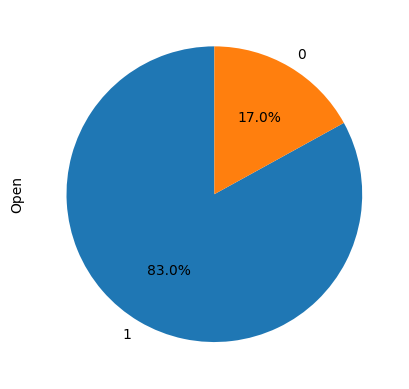

In [198]:
df['Open'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90,counterclock=True)

In [199]:
df['year'].value_counts()

2013    406974
2014    373855
2015    236380
Name: year, dtype: int64

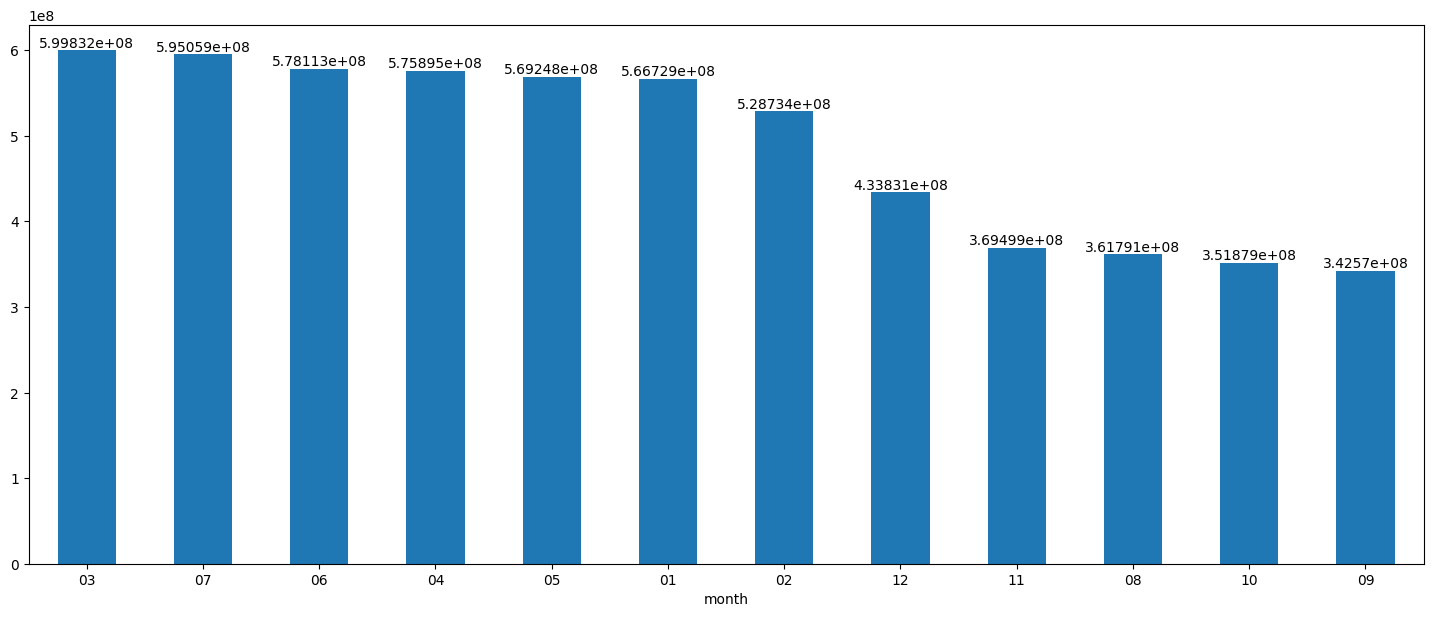

In [206]:
plt.figure(figsize=(18,7))
grouped = df.groupby('month')['Sales'].sum().sort_values(ascending=False)
countwise=grouped.plot(kind='bar')
plt.xticks(rotation=0)
for bars in countwise.containers:
    countwise.bar_label(bars)
